In [76]:
# Author: Lou Pemberton-Roberts
# Data Source: https://www.kaggle.com/datasets/shrutimechlearn/customer-data
# Description: Customer segmentation using KMeans clustering with PCA.

In [77]:
import pandas as pd
import numpy as np

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [80]:
df = pd.read_csv('Mall_Customers.csv', index_col=0)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [81]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [83]:
# change the type for 'Genre' from String to integer using a dictionary

gender = {'Male':1, 'Female':2}

df.Genre = [gender[item] for item in df.Genre]
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,2,20,16,6
4,2,23,16,77
5,2,31,17,40


In [84]:
# change column header from 'Genre' to 'Gender'

df = df.rename(columns={'Genre': 'Gender'})

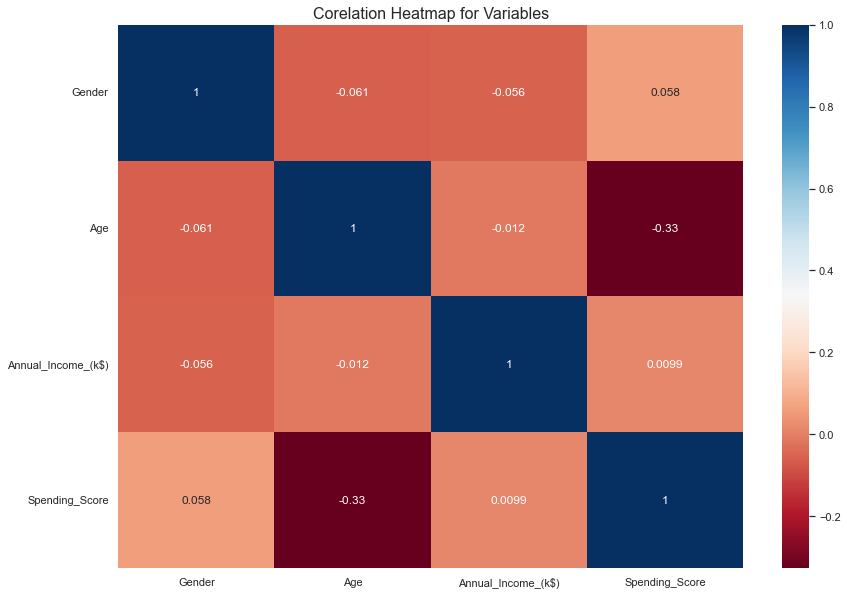

In [85]:
# corrr method for correlation between variables

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.title('Corelation Heatmap for Variables', fontsize=16)
plt.yticks(rotation=0)
plt.show()

There is positive correlation between Gender and Spending Score, and Annual Income and Spending Score.

This indicates that the higher the salary, the more a customer spends. The correlation between Gender and Spending Score could indicate one gender having a higher spending score than the other, so I will check this next.

In [86]:
# create two DataFrames - one for Male and one for Female 
mss = df.loc[df['Gender'] == 1] # 1 is Male
fss = df.loc[df['Gender'] == 2] # 2 is Female

In [87]:
# use decribe to find the average Spending Scorefor each Gender
mss.describe()

,Gender,Age,Annual_Income_(k$),Spending_Score
count,88.0,88.000000,88.000000,88.000000
mean,1.0,39.806818,62.227273,48.511364
std,0.0,15.514812,26.638373,27.896770
min,1.0,18.000000,15.000000,1.000000
25%,1.0,27.750000,45.500000,24.500000
50%,1.0,37.000000,62.500000,50.000000
75%,1.0,50.500000,78.000000,70.000000
max,1.0,70.000000,137.000000,97.000000


In [88]:
fss.describe()

,Gender,Age,Annual_Income_(k$),Spending_Score
count,112.0,112.000000,112.000000,112.000000
mean,2.0,38.098214,59.250000,51.526786
std,0.0,12.644095,26.011952,24.114950
min,2.0,18.000000,16.000000,5.000000
25%,2.0,29.000000,39.750000,35.000000
50%,2.0,35.000000,60.000000,50.000000
75%,2.0,47.500000,77.250000,73.000000
max,2.0,68.000000,126.000000,99.000000


Females have a higher average Spending Score than Males, so the correlation between Gender and Spending Score and Annual Income and Spending Score indicates that the higher-earning Females spend the most in the mall.

Standardisation for preprocessing the data

In [89]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [90]:
df_std = pd.DataFrame(data = df_std, columns = df.columns)

PCA with K-Means using WCSS and Elbow method

In [91]:
pca = PCA()
pca.fit(df_std)

PCA()

In [92]:
pca.explained_variance_ratio_

array([0.33690046, 0.26230645, 0.23260639, 0.16818671])

The first component explains 34% of the variablity of the data. Followed by 26%, 23%, and 17%.

Text(0, 0.5, 'Cumulative Explained Variance')

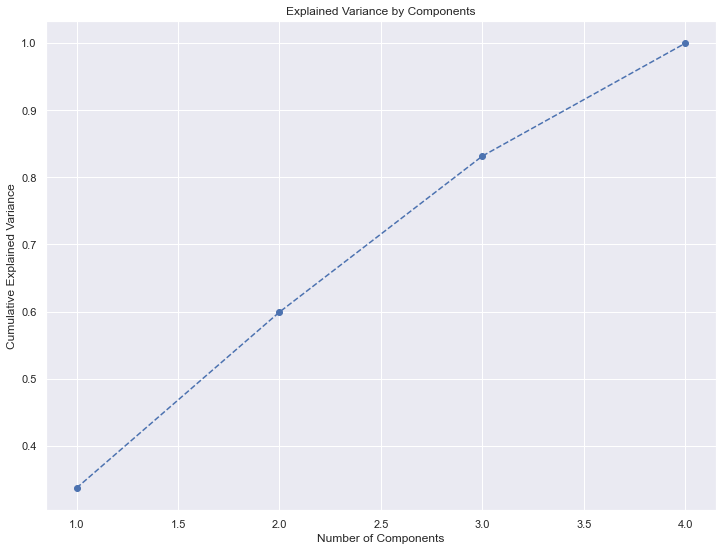

In [93]:
plt.figure(figsize = (12,9))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [94]:
pca = PCA(n_components = 3)
pca.fit(df_std)
pca.components_

array([[-0.23430156,  0.68790025, -0.00608217, -0.68691996],
       [-0.62688553, -0.10368955,  0.7652519 ,  0.10321115],
       [ 0.74300906,  0.12238438,  0.64366712, -0.13657317]])

In [95]:
df_pca = pd.DataFrame(data = pca.components_, columns = df.columns, index = ['Component 1', 'Component 2', 'Component 3'])
df_pca

,Gender,Age,Annual_Income_(k$),Spending_Score
Component 1,-0.234302,0.687900,-0.006082,-0.686920
Component 2,-0.626886,-0.103690,0.765252,0.103211
Component 3,0.743009,0.122384,0.643667,-0.136573


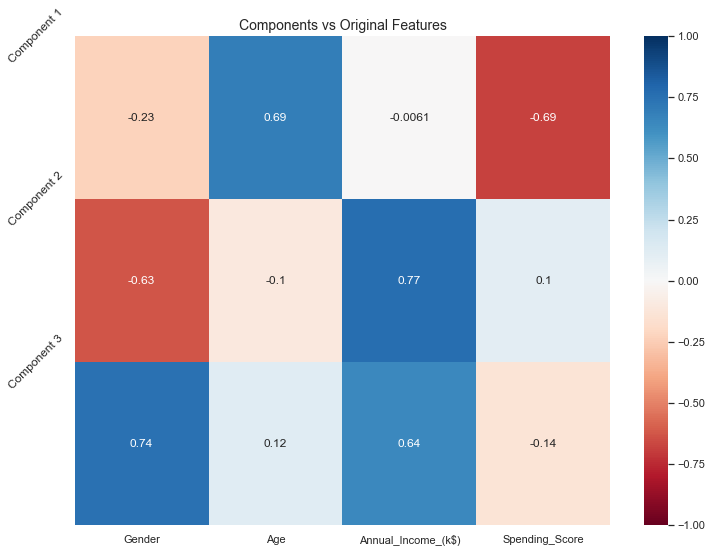

In [96]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True)
plt.yticks([0, 1, 2], ['Component 1', 'Component 2', 'Component 3'], rotation = 45, fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

Component 1 has a positive correlation with Age. Annual Income loads negatively, but is still important. 

Component 2 has a positive correlation with Annual Income and Spending Score. This component shows the high customer value of the individual.

Component 3 has a positve correlation with Gender, Age, and Annual Income.

In [97]:
pca.transform(df_std)
score_pca = pca.transform(df_std)

K-Means Clustering

In [98]:
# Within Clusters Sum of Squares(WCSS) and Elbow Method

wcss = []
for i in range(1,11):
    km_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km_pca.fit(score_pca)
    wcss.append(km_pca.inertia_)

c:\Users\ballo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


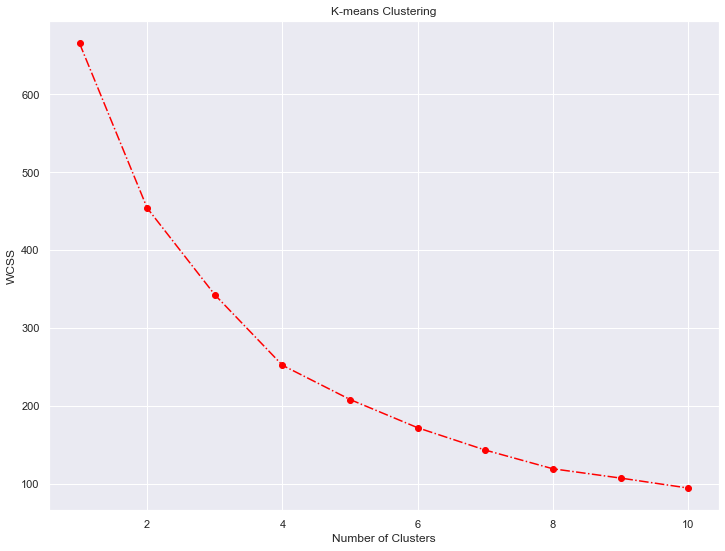

In [99]:
plt.figure(figsize = (12,9))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [100]:
# K-Means clustering

km_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
km_pca.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

In [101]:
df_seg = pd.concat([df.reset_index(drop = True), pd.DataFrame(score_pca)], axis = 1)
df_seg.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

df_seg['Seg/K-means/PCA'] = km_pca.labels_
df_seg.head()

,Gender,Age,Annual_Income_(k$),Spending_Score,Component 1,Component 2,Component 3,Seg/K-means/PCA
0,1,19,15,39,-0.406383,-0.520714,-2.072527,2
1,1,21,15,81,-1.427673,-0.367310,-2.277644,2
2,2,20,16,6,0.050761,-1.894068,-0.367375,1
3,2,23,16,77,-1.694513,-1.631908,-0.717467,3
4,2,31,17,40,-0.313108,-1.810483,-0.426460,1


In [102]:
# calculating the means by segments

df_seg_fqncy = df_seg.groupby(['Seg/K-means/PCA']).mean()
df_seg_fqncy

,Gender,Age,Annual_Income_(k$),Spending_Score,Component 1,Component 2,Component 3
Seg/K-means/PCA,,,,,,,
0,1.0,49.437500,62.416667,29.208333,1.346375,0.598558,-0.588323
1,2.0,47.803571,58.071429,34.875000,0.643591,-0.756396,0.757360
2,1.0,28.250000,62.000000,71.675000,-0.831991,0.914209,-1.009810
3,2.0,28.392857,60.428571,68.178571,-1.203347,-0.409660,0.468210


Segment 0 consists of older males with high incomes but low spending scores.

Segment 1 consists of older females with lower incomes and low spending scores.

Segment 2 consists of young males with high incomes and high spending scores.

Segment 3 consists of young females with high incomes and high spending scores.

In [103]:
# convert segment numbers to label and display number of observations and proportions of each segment

df_seg_fqncy['No. Obs'] = df_seg[['Seg/K-means/PCA','Gender']].groupby(['Seg/K-means/PCA']).count()
df_seg_fqncy['Prop Obs'] = df_seg_fqncy['No. Obs'] / df_seg_fqncy['No. Obs'].sum()
df_seg_fqncy = df_seg_fqncy.rename({0:'high income/low spending score', 1:'low value customers',2:'high value customers - male', 3:'high value customers - female'})
df_seg_fqncy

,Gender,Age,Annual_Income_(k$),Spending_Score,Component 1,Component 2,Component 3,No. Obs,Prop Obs
Seg/K-means/PCA,,,,,,,,,
high income/low spending score,1.0,49.437500,62.416667,29.208333,1.346375,0.598558,-0.588323,48,0.24
low value customers,2.0,47.803571,58.071429,34.875000,0.643591,-0.756396,0.757360,56,0.28
high value customers - male,1.0,28.250000,62.000000,71.675000,-0.831991,0.914209,-1.009810,40,0.20
high value customers - female,2.0,28.392857,60.428571,68.178571,-1.203347,-0.409660,0.468210,56,0.28


c:\Users\ballo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


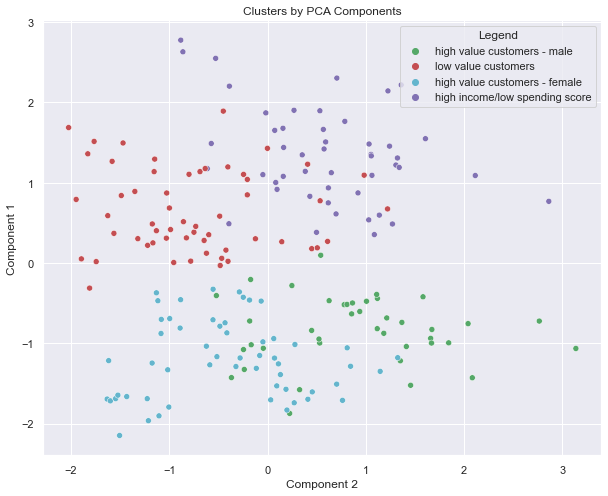

In [104]:
# mapping the clusters for visualisation

df_seg['Legend'] = df_seg['Seg/K-means/PCA'].map({0:'high income/low spending score', 1:'low value customers',2:'high value customers - male', 3:'high value customers - female'})
x_axis = df_seg['Component 2']
y_axis = df_seg['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()